In [1]:
# Importação das bibliotecas utilizadas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# Iniciando a base de dados
db = "State_of_data_2022.csv"
data = pd.read_csv(db)
data.head()

# Visualizar as primeiras linhas da base de dados para entender sua estrutura
lines_show = 2
#print(data.head(lines_show))


In [3]:
# Montar o DataFrame com apenas as colunas que serão utilizadas para a análise

#Selecionar todas as colunas da Parte 2:

part2_columns = data.columns[data.columns.str.startswith("('P2")] # Selecionar as colunas que começam com P2
part2_columns_idx = [data.columns.get_loc(col) for col in part2_columns] # Obter os índices das colunas da Parte 2
data_part2 = data.iloc[:, part2_columns_idx] # Criar DataFrame apenas com as colunas da Parte 2
df2 = data_part2.iloc[:, [0, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18]] # Criar um novo DataFrame apenas com as colunas que serão utilizadas

# Adicionar coluna da Parte 1: Genero

df2.insert(0, "('P1_b ', 'Genero')", data["('P1_b ', 'Genero')"].copy())

In [4]:
# Tratando as informações

# Lista de valores a serem mantidos
valores_validos = ['Masculino', 'Feminino']

# Filtrar o DataFrame para manter apenas as linhas com valores válidos na coluna 'Genero'
df2 = df2[df2["('P1_b ', 'Genero')"].isin(valores_validos)]


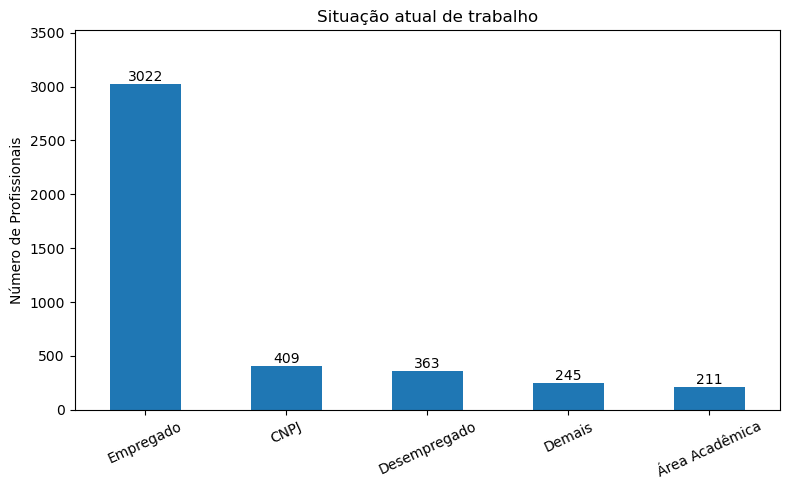

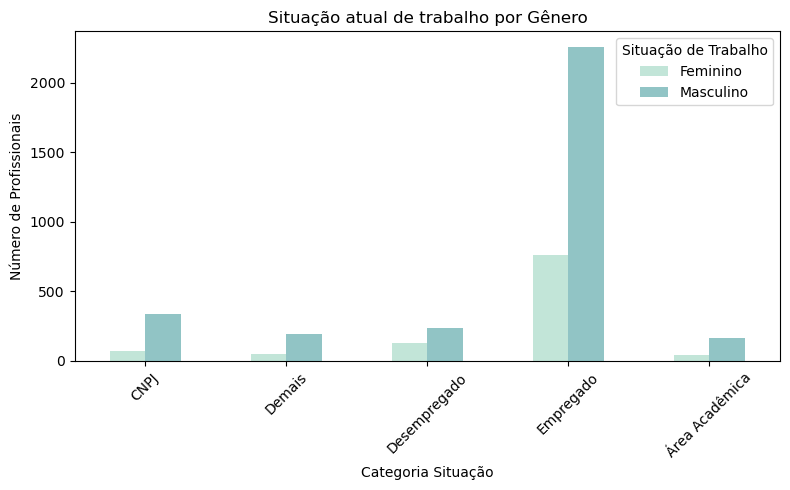

In [5]:
# Definir a função para categorizar os valores da coluna
def categorize_situacao(situacao):
    if situacao in ['Desempregado, buscando recolocação', 'Desempregado e não estou buscando recolocação']:
        return 'Desempregado'
    elif situacao in ['Trabalho na área Acadêmica/Pesquisador', 'Somente Estudante (pós-graduação)', 'Somente Estudante (graduação)']:
        return 'Área Acadêmica'
    elif situacao == 'Empreendedor ou Empregado (CNPJ)':
        return 'CNPJ'
    elif situacao in ['Servidor Público', 'Empregado (CLT)', 'Vivo fora do Brasil e trabalho para empresa de fora do Brasil', 'Vivo no Brasil e trabalho remoto para empresa de fora do Brasil']:
        return 'Empregado'
    else:
        return 'Demais'

# Aplicar a função para criar a nova coluna de categorias
df2.insert(len(df2.columns), 'Categoria Situação', df2["('P2_a ', 'Qual sua situação atual de trabalho?')"].apply(categorize_situacao).copy())


# Situação de Trabalho
contagem_cargos = df2['Categoria Situação'].value_counts()

# Criação do gráfico de barras
plt.figure(figsize=(8, 5))
ax = contagem_cargos.plot(kind='bar')
plt.title('Situação atual de trabalho')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=25, ha="center")  # Ajusta o ângulo e o alinhamento dos rótulos
ax.set_xticklabels(contagem_cargos.index)  # Define os rótulos manualmente

# Adicionar os valores exatos acima das barras
for i, v in enumerate(contagem_cargos):
    ax.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10)

# Ajustar os limites do eixo y para aumentar a borda superior
plt.ylim(top=max(contagem_cargos) + 500)  # Aumenta a borda superior

plt.tight_layout()
plt.show()

# Contagem da situação de trabalho por gênero

contagem_situacao_genero = df2.groupby('Categoria Situação')["('P1_b ', 'Genero')"].value_counts().unstack()

# Plotagem do gráfico de barras
ax = contagem_situacao_genero.plot(kind='bar', figsize=(8, 5), color=sns.cubehelix_palette(start=.5, rot=-.5))
plt.title('Situação atual de trabalho por Gênero')
plt.ylabel('Número de Profissionais')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title="Situação de Trabalho")
plt.show()

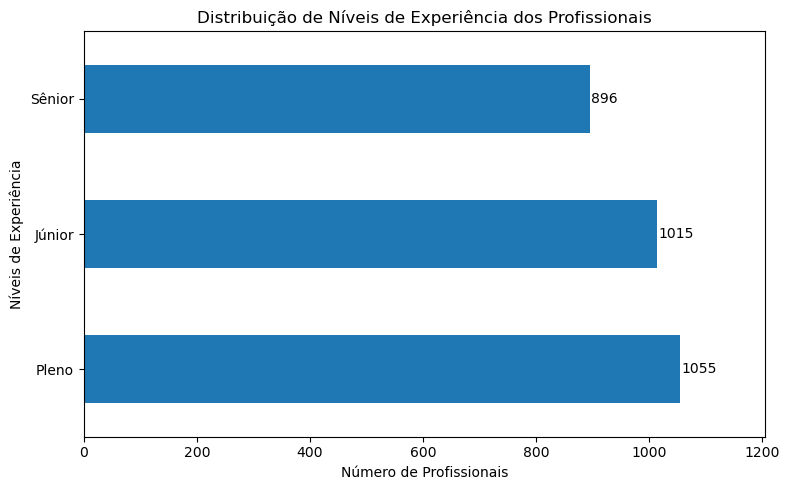

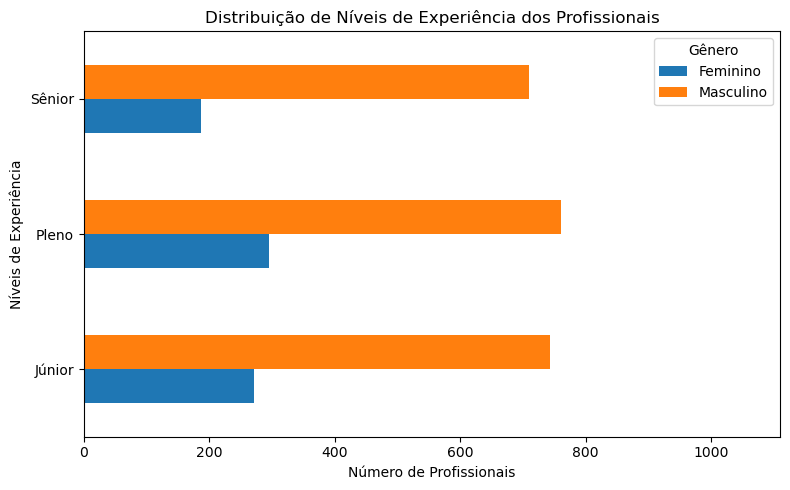

In [6]:
# Distribuição de níveis de experiência
contagem_niveis = df2["('P2_g ', 'Nivel')"].value_counts()

# Criação do gráfico de barras laterais
ax = contagem_niveis.plot(kind='barh', figsize=(8, 5))  # Use 'barh' para barras horizontais
plt.title('Distribuição de Níveis de Experiência dos Profissionais')
plt.xlabel('Número de Profissionais')
plt.ylabel('Níveis de Experiência')

# Adicionar os valores exatos ao final de cada barra
for i, v in enumerate(contagem_niveis):
    ax.text(v + 2, i, str(v), color='black', va='center')  # Ajuste a posição dos valores

# Aumentar a borda direita
ax.set_xlim(right=max(contagem_niveis) + 150)  # Ajuste o valor conforme necessário

plt.tight_layout()
plt.show()

# Distribuição de níveis de experiência
contagem_niveis_genero = df2.groupby("('P2_g ', 'Nivel')")["('P1_b ', 'Genero')"].value_counts().unstack()


# Criação do gráfico de barras laterais
ax = contagem_niveis_genero.plot(kind='barh', figsize=(8,5))  # Use 'barh' para barras horizontais
plt.title('Distribuição de Níveis de Experiência dos Profissionais')
plt.xlabel('Número de Profissionais')
plt.ylabel('Níveis de Experiência')

# Aumentar a borda direita
ax.set_xlim(right=contagem_niveis_genero.max().max() + 350)  # Ajuste o valor conforme necessário

plt.tight_layout()
plt.legend(title="Gênero")
plt.show()




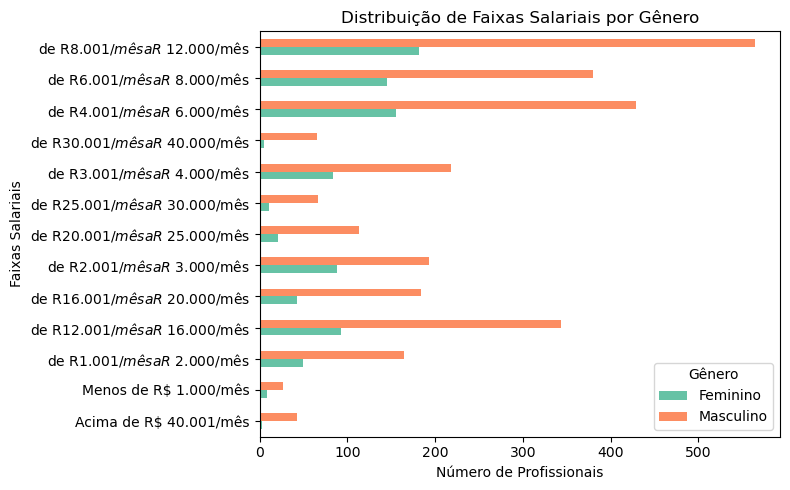

In [7]:
# Distribuição de salários por gênero
contagem_niveis_genero = df2.groupby("('P2_h ', 'Faixa salarial')")["('P1_b ', 'Genero')"].value_counts().unstack()

# Criação do gráfico de barras laterais
ax = contagem_niveis_genero.plot(kind='barh', figsize=(8,5), color=sns.color_palette("Set2"))  # Use 'barh' para barras horizontais
plt.title('Distribuição de Faixas Salariais por Gênero')
plt.xlabel('Número de Profissionais')
plt.ylabel('Faixas Salariais')

plt.tight_layout()
plt.legend(title="Gênero")
plt.show()